In [30]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import random

In [31]:
# loading the dataset 
with open('SMAI-Dataset-problem-4.3/colors.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [32]:
loaded_data.shape

(100, 2)

In [33]:
# finding the parameters of this dataset using GMM distribution
gmm = GaussianMixture(n_components=7)
gmm.fit(loaded_data)
labels = gmm.predict(loaded_data)

means = gmm.means_
covariances = gmm.covariances_

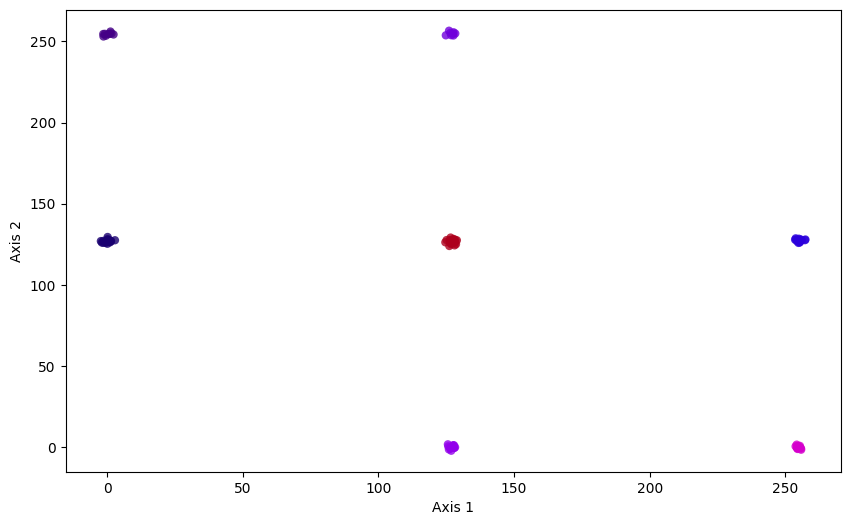

In [35]:
# plotting the dataset with the labels
x1 = loaded_data[:, 0]
x2 = loaded_data[:, 1]

custom_colors = []
for x1i, x2i in means:
    custom_colors.append((x1i, 0, x2i))
cmap = plt.cm.colors.ListedColormap(custom_colors)

plt.figure(figsize = (10, 6))
plt.scatter(x1, x2, c=labels, edgecolor="none", alpha=0.8, cmap=cmap, label=labels)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.show()

In [15]:
# generating a sample dataset with n_components given its mean and covariance
def generate_sample_dataset(n_components, means, covariances):
    num_samples = 1000
    samples_per_component = int(num_samples / n_components)
    samples = []
    total_components = len(means)
    indices = [x for x in range(total_components)]
    random.shuffle(indices)

    for i in range(min(n_components, total_components)):
        mean = means[indices[i]]
        cov = covariances[indices[i]]
        component_samples = np.random.multivariate_normal(mean, cov, samples_per_component)
        samples.extend(component_samples.tolist())

    samples = np.array(samples)
    return samples

In [26]:
# generating a sample dataset with 7 components
dataset = generate_sample_dataset(7, means, covariances)
dataset.shape

(994, 2)

In [27]:
gmm = GaussianMixture(n_components=7)
gmm.fit(dataset)
labels = gmm.predict(dataset)


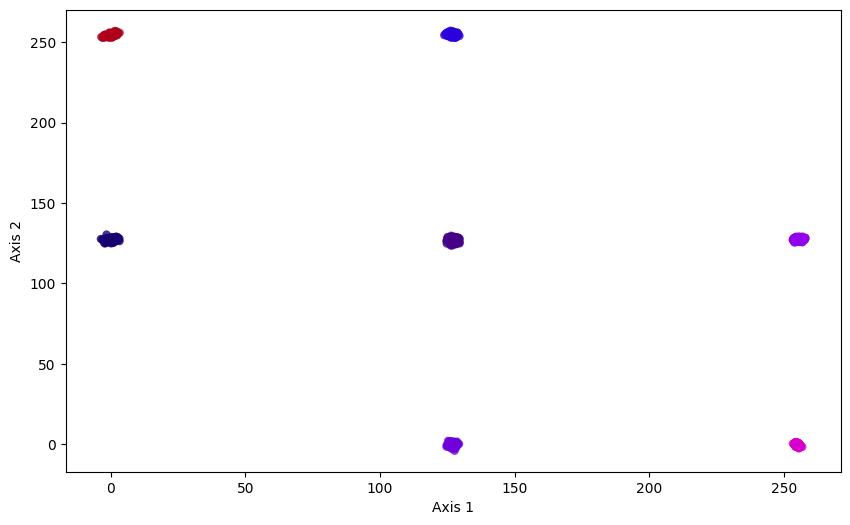

In [28]:
# plotting the dataset with the labels obtained from GMM distribution
x1 = dataset[:, 0]
x2 = dataset[:, 1]

custom_colors = []
for x1i, x2i in means:
    custom_colors.append((x1i, 0, x2i))
cmap = plt.cm.colors.ListedColormap(custom_colors)

plt.figure(figsize = (10, 6))
plt.scatter(x1, x2, c=labels, edgecolor="none", alpha=0.8, cmap=cmap, label=labels)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.show()